# CS3PP19 - Programming in Python for Data Science - Practical 5

## Clustering Algorithms 

Follow the instructions to complete each of these tasks. This set of exercises focuses on working with Python's Pandas library.

**Questions marked with a * are extra challenging**

The relevant materials for these exercises is lecture 12 - Clustering.

This is not assessed but will help you gain practical experience for the exam and coursework.

You will need to download some of the csv data set files from the module Blackboard page and place them in the same folder as this notebook. Run the cell below to load all of the necessary Python modules.


### Clustering 

#### Dataset: Faithfull dataset 
Observations of the ‘Old faithful’ geyser in Yellowstone National Park. 
 - Measurements of eruption time and waiting time since the previous eruption
Source: Data taken from R statistical environment, Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics, 39, 357–365.

1. Perform the exploratory analysis of the data:
    - How many variables?
    - Characteristics of the variables?
    - How many rows?
    - How is the distribution of the variables (graph)? 
    
__Note:__ Seaborn can be useful to generate graphs to analyse the relationship between the variables. 

2. Clustering analysis:
    - Apply the clustering algorithms K-means and GMM to the data set under the following conditions:
        - 2, 3 and 4 clusters
        - Visualise the behaviour of the different clusters sets (you can use the functions defined in the Clustering Lecture). 

    - Identify the ideal number of cluster selection for K-means and GMM. Create a graph of each ideal cluster number set up for K-means and GMM. Compare and contrast.
    - Normalise the data and analyse the impact

In [1]:
##Importing libraries needed.
##Typical liubraries for data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

##Libraries needed for training the clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

##Libraries needed for the additional functions and metrics: 
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
##Needed for normalisation
from sklearn import preprocessing

#### 1.Exploratory analysis

In [2]:
##loading the data:
faithful = pd.read_csv("faithful.csv")
##How many variables?:
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [3]:
##Characteristics of the variables?:
faithful.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [4]:
##How many rows?:
len(faithful)

272

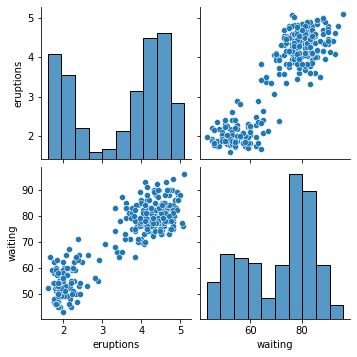

In [5]:
##How is the distribution of the variables?
sns.pairplot(faithful)

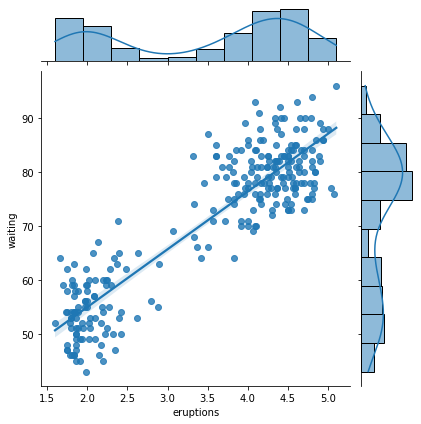

In [6]:
sns.jointplot(x='eruptions',y='waiting',data=faithful, kind='reg')

#### 2. Clustering analysis

Apply the clustering algorithms K-means and GMM to the data set under the following conditions:
- 2, 3 and 4 clusters
- Visualise the behaviour of the different clusters sets (you can use the functions defined in the Clustering Lecture).

In [7]:
##Creating a method to visualise the centroids area of influence

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [8]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [9]:
##Defining and traing the models:

##Defining the clusters to analyse 
c_num = 2 

#Creating the deffinition of the models
km_faithful = KMeans(n_clusters=c_num)
gmm_faithful = GMM(n_components=c_num)

#Training the model to a particular dataset
km_faithful.fit(faithful[['eruptions','waiting']])
gmm_faithful.fit(faithful[['eruptions','waiting']])

#Predicting the "labels" with the model defined and trained before
y_km_faithful = km_faithful.predict(faithful[['eruptions','waiting']])
y_gmm_faithful = gmm_faithful.predict(faithful[['eruptions','waiting']])

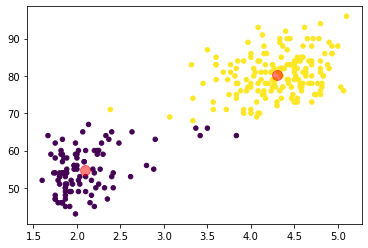

In [10]:
plt.scatter(x='eruptions', y='waiting', data=faithful, c=y_km_faithful, s=20, cmap='viridis');
centers = km_faithful.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

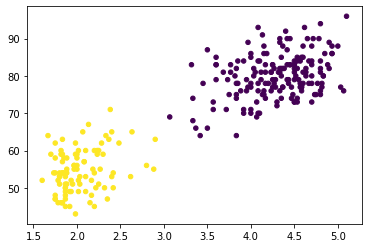

In [11]:
plt.scatter(x='eruptions', y='waiting', data=faithful, c=y_gmm_faithful, s=20, cmap='viridis');

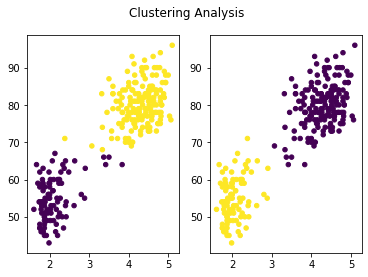

In [12]:
##Create the graphs to compare:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Clustering Analysis ')
ax1.scatter(x='eruptions', y='waiting', data=faithful, c=y_km_faithful, s=20, cmap='viridis');
ax2.scatter(x='eruptions', y='waiting', data=faithful, c=y_gmm_faithful, s=20, cmap='viridis');

- Identify the ideal number of cluster selection for K-means and GMM. Create a graph of each ideal cluster number set up for K-means and GMM. Compare and contrast.

In [13]:
## List to store the metric value given different K values
inertia = []
#Range of the different values of K to analyse
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(faithful[['eruptions','waiting']])
    inertia.append(km.inertia_)

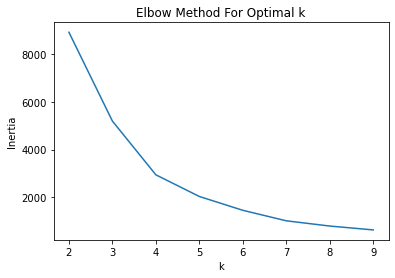

In [14]:
plt.plot(K, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
##K-means:
##Import the library to calculate the silhouette score
from sklearn.metrics import silhouette_score
## List to store the metric value given different K values
s_score = []
#Range of the different values of K to analyse
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(faithful)
    s_score.append(silhouette_score(faithful[['eruptions','waiting']], kmeans.labels_))

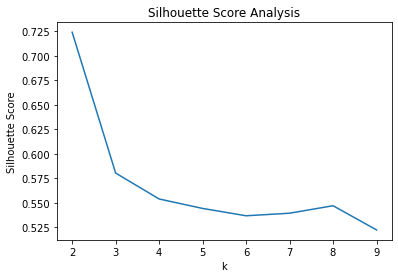

In [16]:
##Plotting the values of the metric
plt.plot(K, s_score)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

C:\Users\shavi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


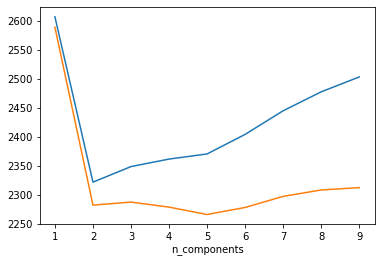

In [17]:
n_components = range(1, 10)

models = [GMM(n, covariance_type='full', random_state=0).fit(faithful[['eruptions','waiting']])
          for n in n_components]

plt.plot(n_components, [m.bic(faithful[['eruptions','waiting']]) for m in models], label='BIC')
plt.plot(n_components, [m.aic(faithful[['eruptions','waiting']]) for m in models], label='AIC')
plt.xlabel('n_components');

In [18]:
X = faithful.values
X = X[:, ::-1] # flip axes for better plotting

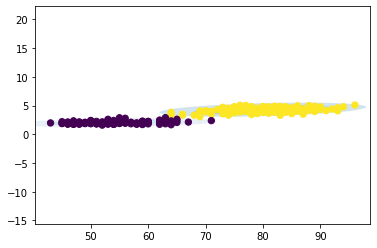

In [19]:
gmm = GMM(n_components=2, random_state=42)
plot_gmm(gmm, X)

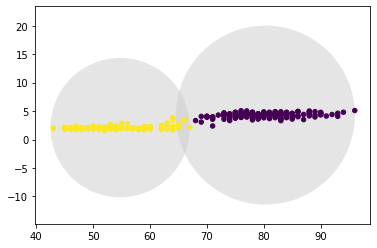

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X)

In [21]:
##Z-Normalisation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_faithful = scaler.fit_transform(faithful)

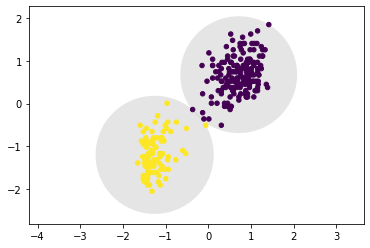

In [22]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, scaled_faithful)

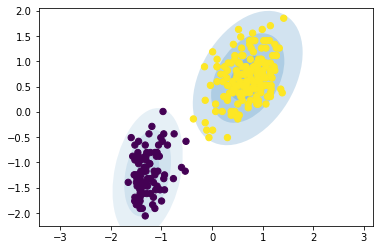

In [23]:
gmm = GMM(n_components=2, random_state=42)
plot_gmm(gmm, scaled_faithful)

C:\Users\shavi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


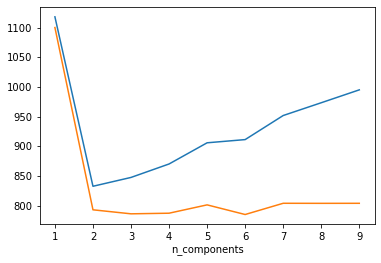

In [24]:
n_components = range(1, 10)

models = [GMM(n, covariance_type='full', random_state=0).fit(scaled_faithful)
          for n in n_components]

plt.plot(n_components, [m.bic(scaled_faithful) for m in models], label='BIC')
plt.plot(n_components, [m.aic(scaled_faithful) for m in models], label='AIC')
plt.xlabel('n_components');